In [1]:
import json
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
import os                  # dealing with directories
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential


In [2]:

batch_size = 64
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 64, 64


In [ ]:
DATADIR = "C:/tensorflow/sudoku/dataset"
CATEGORIES = ["0","1","2","3","4","5","6","7","8","9"]
data = []
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (img_rows,img_cols))
        data.append([np.array(image),int(category)])
        

In [ ]:
plt.imshow(data[6000][0])
data[6000][1]

In [ ]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, shuffle = True)

In [ ]:
shuffle(data)

In [ ]:
len(data)

In [ ]:
plt.imshow(data[6000][0])
data[6000][1]

In [ ]:
np.save('char74_digits_0_to_10_data.npy',data)

In [ ]:
training_data = data[0:8000]
testing_data = data[8001:10160]

In [ ]:
np.save('training_char74_digits_0_to_9_8000_examples.npy',training_data)
np.save('testing_char74_digits_0_to_9_2160_examples.npy',testing_data)

In [ ]:
plt.imshow(testing_data[0][0])
testing_data[0][1]

In [ ]:
x_train = []
y_train = []
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)

In [ ]:
plt.imshow(x_train[0])
y_train[0]

In [ ]:
x_test = []
y_test = []
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)

In [10]:
np.save('x_train_char74_digits_0_to_9_2160_examples.npy',x_train)
np.save('y_train_char74_digits_0_to_9_2160_examples.npy',y_train)
np.save('x_test_char74_digits_0_to_9_2160_examples.npy',x_test)
np.save('y_test_char74_digits_0_to_9_2160_examples.npy',y_test)

NameError: name 'x_train' is not defined

In [ ]:
plt.imshow(x_test[0])
y_test[0]

In [35]:
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [3]:
training_data = np.load('C:/tensorflow/sudoku/training_char74_digits_0_to_9_8000_examples.npy')


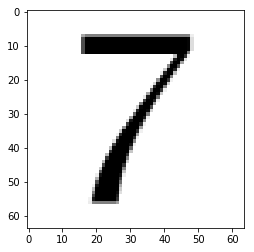

7


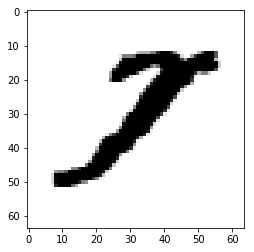

7


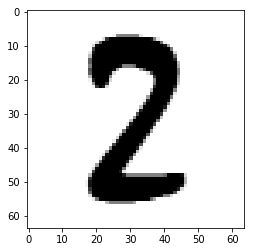

2


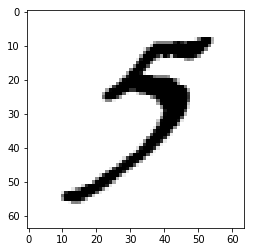

5


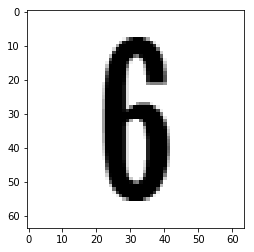

6


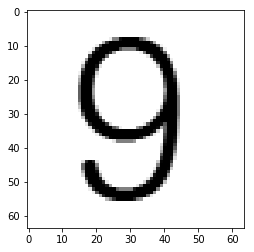

9


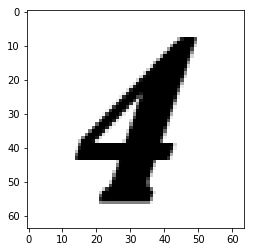

4


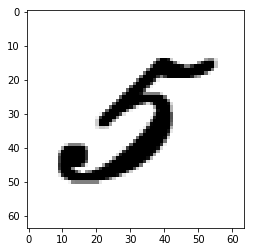

5


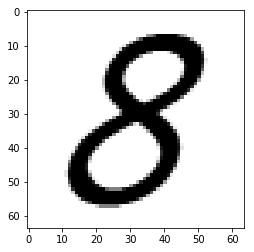

8


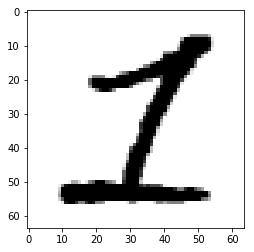

1


In [4]:
for i in range(0,10):
    plt.imshow(training_data[i][0],cmap = 'gray')
    plt.show()
    print(training_data[i][1])

In [ ]:

y_train, y_test, x_train, x_test = np.array(y_train), np.array(y_test), np.array(x_train), np.array(x_test)


In [3]:
x_train = np.load('C:/tensorflow/sudoku/x_train_char74_digits_0_to_9_8000_examples.npy')
x_test = np.load('C:/tensorflow/sudoku/x_test_char74_digits_0_to_9_2160_examples.npy')
y_train = np.load('C:/tensorflow/sudoku/y_train_char74_digits_0_to_9_8000_examples.npy')
y_test = np.load('C:/tensorflow/sudoku/y_test_char74_digits_0_to_9_2160_examples.npy')

In [17]:
x_train.shape

(8000, 64, 64, 1)

In [18]:
x_test.shape

(2159, 64, 64, 1)

In [19]:
y_train.shape


(8000, 10)

In [20]:


y_test.shape

(2159, 10)

In [12]:

ind_list_train = [i for i in range(x_train.shape[0])]
shuffle(ind_list_train)
x_train = x_train[ind_list_train, :, :, ]
y_train = y_train[ind_list_train,]

ind_list_test = [i for i in range(x_test.shape[0])]
shuffle(ind_list_test)
x_test = x_test[ind_list_test, :, :, ]
y_test = y_test[ind_list_test,]



In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [13]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


8000 train samples
2159 test samples


In [14]:
y_test[0]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [7]:

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2)


Epoch 1/12
100/100 [==============================] - 112s 1s/step - loss: 2.3023 - accuracy: 0.1197 - val_loss: 2.2746 - val_accuracy: 0.3275
Epoch 2/12
100/100 [==============================] - 125s 1s/step - loss: 2.2766 - accuracy: 0.1509 - val_loss: 2.2477 - val_accuracy: 0.4794
Epoch 3/12
100/100 [==============================] - 114s 1s/step - loss: 2.2471 - accuracy: 0.2014 - val_loss: 2.2182 - val_accuracy: 0.5619
Epoch 4/12
100/100 [==============================] - 112s 1s/step - loss: 2.2192 - accuracy: 0.2439 - val_loss: 2.1855 - val_accuracy: 0.6275
Epoch 5/12
100/100 [==============================] - 104s 1s/step - loss: 2.1866 - accuracy: 0.2837 - val_loss: 2.1506 - val_accuracy: 0.7006
Epoch 6/12
100/100 [==============================] - 104s 1s/step - loss: 2.1539 - accuracy: 0.3202 - val_loss: 2.1125 - val_accuracy: 0.7519
Epoch 7/12
100/100 [==============================] - 104s 1s/step - loss: 2.1219 - accuracy: 0.3609 - val_loss: 2.0738 - val_accuracy: 0.7094

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 1.8273146152496338
Test accuracy: 0.8309402465820312


In [9]:
model.save('model_64_83.h5')